import pandas as pd
import glob
interesting_files = glob.glob("*.csv")
df_list = []
for filename in sorted(interesting_files):
    df_list.append(pd.read_csv(filename))
full_df = pd.concat(df_list)

full_df.to_csv('output.csv')

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('nBagg')
import plotly.express as px
import seaborn as sns
%matplotlib inline
import plotly.express as px
from wordcloud import WordCloud,STOPWORDS

In [40]:
data = pd.read_csv('COMBINED_Swiggy.csv')

In [41]:
data

,url,Restaurant_Name,cuisine,ratt,locality
0,https://www.swiggy.com/restaurants/sweet-benga...,Sweet Bengal,"Sweets, Indian, Snacks, Desserts",4.5•-- MINS•₹150 FOR TWO,CBD_BELAPUR
1,https://www.swiggy.com/restaurants/ubq-by-barb...,UBQ by Barbeque Nation,"North Indian, Mughlai, Seafood, Biryani, Desse...",3.9•-- MINS•₹300 FOR TWO,CBD_BELAPUR
2,https://www.swiggy.com/restaurants/laxmi-pure-...,Laxmi Pure Veg,"North Indian, Chinese, South Indian, Street Fo...",4.1•-- MINS•₹500 FOR TWO,CBD_BELAPUR
3,https://www.swiggy.com/restaurants/dominos-piz...,Domino's Pizza,Pizzas,4.3•-- MINS•₹400 FOR TWO,CBD_BELAPUR
4,https://www.swiggy.com/restaurants/subway-bela...,Subway,"Fast Food, Salads, Snacks, Desserts, Beverages",4.2•-- MINS•₹350 FOR TWO,CBD_BELAPUR
...,...,...,...,...,...
11982,https://www.swiggy.com/restaurants/tandoori-ni...,Tandoori night's,"Chinese, Indian, Biryani, Tandoor, Fast Food, ...",--•-- MINS•₹300 FOR TWO,VIRAR
11983,https://www.swiggy.com/restaurants/wch-waffle-...,WCH-Waffle Cheela House,"Fast Food, Desserts",--•-- MINS•₹200 FOR TWO,VIRAR
11984,https://www.swiggy.com/restaurants/virar-chask...,Virar Chaska Fast Food,"Chinese, Indian, Italian, Pizzas",--•-- MINS•₹300 FOR TWO,VIRAR
11985,https://www.swiggy.com/restaurants/madras-cafe...,Madras Cafe,South Indian,3.8•-- MINS•₹200 FOR TWO,VIRAR


## Creating and Dropping columns

In [42]:
data['ratings'] =  data.ratt.str.split('•').str[0]
data['time'] =  data.ratt.str.split('•').str[1]
data['price_for2'] =  data.ratt.str.split('•').str[2]

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11987 entries, 0 to 11986
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   url              11987 non-null  object
 1   Restaurant_Name  11987 non-null  object
 2   cuisine          11987 non-null  object
 3   ratt             11987 non-null  object
 4   locality         11987 non-null  object
 5   ratings          11987 non-null  object
 6   time             11987 non-null  object
 7   price_for2       11987 non-null  object
dtypes: object(8)
memory usage: 749.3+ KB


In [44]:
data = data.drop(['url', 'ratt'], axis = 1)

## Filtering

In [45]:
data.ratings=data.ratings.str.replace('[--]','0')
data.price_for2=data.price_for2.str.replace('[₹,FOR,TWO, , ]','')

In [46]:
data["ratings"]=data["ratings"].apply(float)

data["price_for2"]=data["price_for2"].apply(float)

In [47]:
data['Restaurant_Name'] = data['Restaurant_Name'].str.title()

## Visualization

In [48]:
data.to_excel(r'COMBINED_Swig_data.xlsx', index = False)

In [49]:
data.locality.unique()

array(['CBD_BELAPUR', 'KHARGHAR', 'MAROL', 'THANE_PANCHPAKHADI', 'VASHI',
       'AIROLI', 'ANDHERI_EAST', 'ANDHERI_WEST', 'BANDRA_WEST', 'BHANDUP',
       'BHAYANDAR', 'BORIVALI', 'BYCULLA', 'CHEMBUR', 'CHOWPATTY',
       'DAHISAR_EAST', 'DOMBIVLI', 'COLOBA', 'GHATKOPAR', 'JOG_GOR_WEST',
       'JOG_GOR_EAST', 'JUHU', 'KAMOTHE', 'KURLA', 'LOWER_PAREL_WORLI',
       'MAHALAXMI_MALABAR_HILL', 'MAHIM_DADAR_WEST', 'MALAD_KAN_EAST',
       'MALAD_KAN_WEST', 'MATUNGA', 'MIRA_ROAD', 'NERUL', 'PANVEL',
       'PAREL', 'POWAI', 'SANTACRUZ_EAST_BANDRA_EAST', 'SION_BHAKTI_PARK',
       'THANE_HIRANANDANI_ESTATE', 'THANE', 'VASAI', 'VILE_PARLE',
       'VIRAR'], dtype=object)

<Figure size 1440x1152 with 0 Axes>

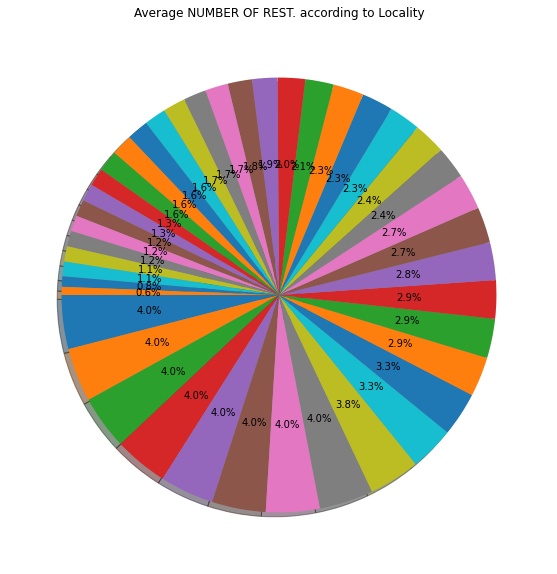

In [50]:
plt.figure(figsize=(20,16))
ax=data.locality.value_counts()
#labels = ['Baner',  'Wakad', 'Hinjewadi', 'Hinjewadi_phase3'] labels= labels,
#explode = (0.1, 0.05, 0.05,0.2) explode=explode,
fig1, ax1 = plt.subplots(figsize=(10,10))
plt.title("Average NUMBER OF REST. according to Locality")
ax1.pie(ax,  shadow=True,autopct='%1.1f%%' ,startangle=180,)
plt.rcParams['font.size'] = 20

plt.show()

In [68]:
plt.figure(figsize=(15,10))
f = data.locality.value_counts()
fig = px.pie(data, values=f, names=f.index, width=950, height=1000,title="Average cost for two person(in %)")
fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)
fig.show()

<Figure size 1080x720 with 0 Axes>

In [70]:
vashi = data[(data.locality == 'VASHI')]
vashi

,Restaurant_Name,cuisine,locality,ratings,time,price_for2
1060,Chinese House,Chinese,VASHI,0.0,-- MINS,300.0
1061,The Oasis-Country Inn& Suites By Radisson,"Fast Food, Indian, Salads, Desserts",VASHI,0.0,-- MINS,500.0
1062,Red Chilli Restaurant,"North Indian, Mughlai",VASHI,4.6,-- MINS,400.0
1063,Hotel Signature,"North Indian, Chinese",VASHI,3.8,-- MINS,800.0
1064,Reema'S Malvani Delicacy,"Indian, Malwani",VASHI,0.0,-- MINS,350.0
...,...,...,...,...,...,...
1535,Biryani Bucket.Com,"North Indian, Biryani",VASHI,3.4,-- MINS,400.0
1536,Veg Sutra,"North Indian, Chinese, Beverages",VASHI,4.2,-- MINS,500.0
1537,Dubai Biryani Dawat,Indian,VASHI,3.9,-- MINS,200.0
1538,The Curry Family,Indian,VASHI,0.0,-- MINS,250.0


In [71]:
plt.figure(figsize=(15,10))
f = vashi.ratings.value_counts()
fig = px.pie(data, values=f, names=f.index, width=950, height=1000,title="Average cost for two person(in %)")
fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)
fig.show()

<Figure size 1080x720 with 0 Axes>

In [72]:
plt.figure(figsize=(15,10))
f = vashi.price_for2.value_counts()
fig = px.pie(data, values=f, names=f.index, width=950, height=1000,title="Average cost for two person(in %)")
fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)
fig.show()

<Figure size 1080x720 with 0 Axes>

In [60]:
valid_data = data[(data.ratings > 1.0)]
valid_data

,Restaurant_Name,cuisine,locality,ratings,time,price_for2
0,Sweet Bengal,"Sweets, Indian, Snacks, Desserts",CBD_BELAPUR,4.5,-- MINS,150.0
1,Ubq By Barbeque Nation,"North Indian, Mughlai, Seafood, Biryani, Desse...",CBD_BELAPUR,3.9,-- MINS,300.0
2,Laxmi Pure Veg,"North Indian, Chinese, South Indian, Street Fo...",CBD_BELAPUR,4.1,-- MINS,500.0
3,Domino'S Pizza,Pizzas,CBD_BELAPUR,4.3,-- MINS,400.0
4,Subway,"Fast Food, Salads, Snacks, Desserts, Beverages",CBD_BELAPUR,4.2,-- MINS,350.0
...,...,...,...,...,...,...
11978,Behrouz Biryani,"Biryani, Mughlai, Lucknowi, Kebabs, Hyderabadi...",VIRAR,4.2,-- MINS,500.0
11979,Ubq By Barbeque Nation,"North Indian, Mughlai, Seafood, Biryani, Desse...",VIRAR,3.6,-- MINS,300.0
11980,Pizza Hut,Pizzas,VIRAR,3.4,-- MINS,350.0
11981,Hotel Sahara (Dhaba),"Indian, Tandoor, Chinese, Biryani",VIRAR,3.7,-- MINS,500.0


<Figure size 720x720 with 0 Axes>

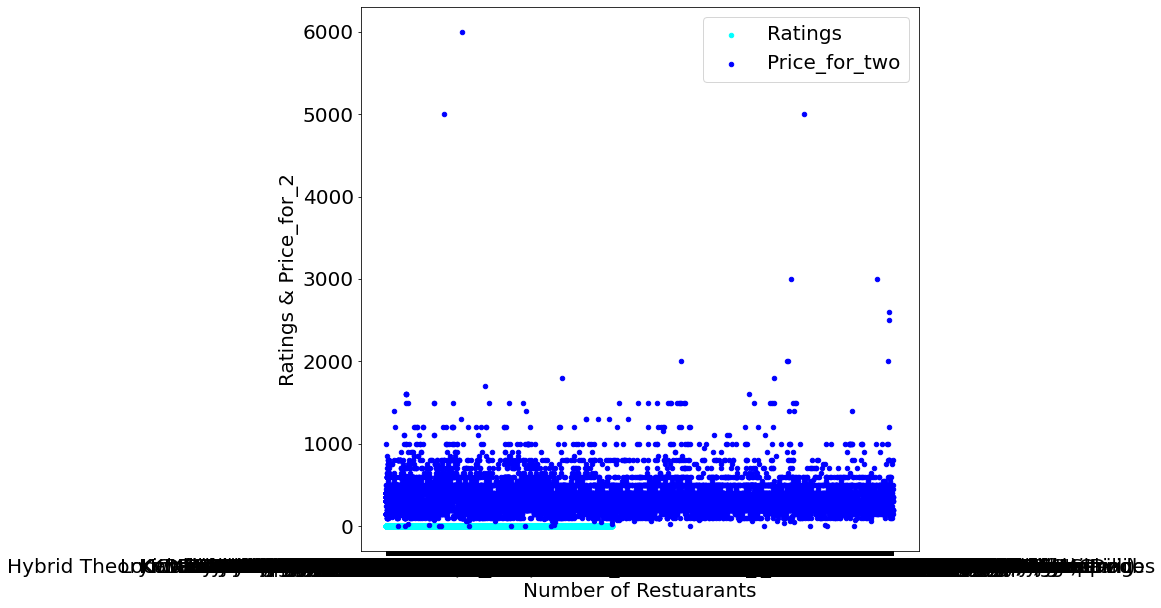

In [61]:
plt.figure(figsize=(10,10))
ax = valid_data.plot(kind="scatter", x='Restaurant_Name', y='ratings', color="cyan",label="Ratings",figsize=(10, 10))
data.plot( kind="scatter",x='Restaurant_Name', y='price_for2', color="b",label="Price_for_two", ax=ax)
ax.set_xlabel("Number of Restuarants")
ax.set_ylabel("Ratings & Price_for_2")
plt.show()

<Figure size 720x720 with 0 Axes>

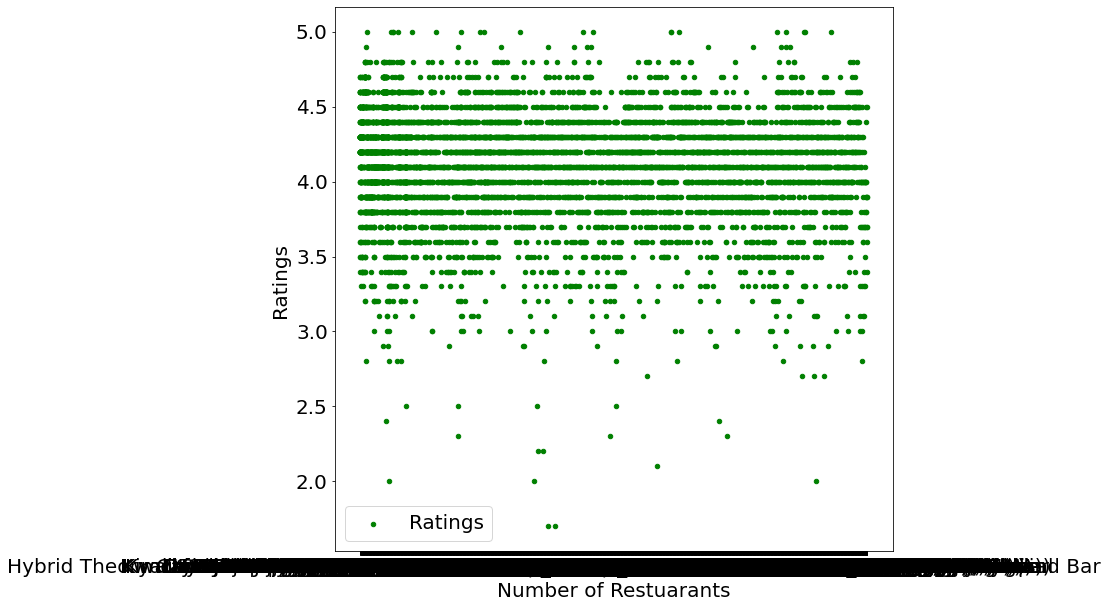

In [62]:
plt.figure(figsize=(10,10))
ax = valid_data.plot(kind="scatter", x='Restaurant_Name', y='ratings', color="g",label="Ratings",figsize=(10, 10))
#combine.plot( kind="scatter",x='name', y='price_for2', color="y",label="Delivery_Reviews", ax=ax)
ax.set_xlabel("Number of Restuarants")
ax.set_ylabel("Ratings ")
plt.show()

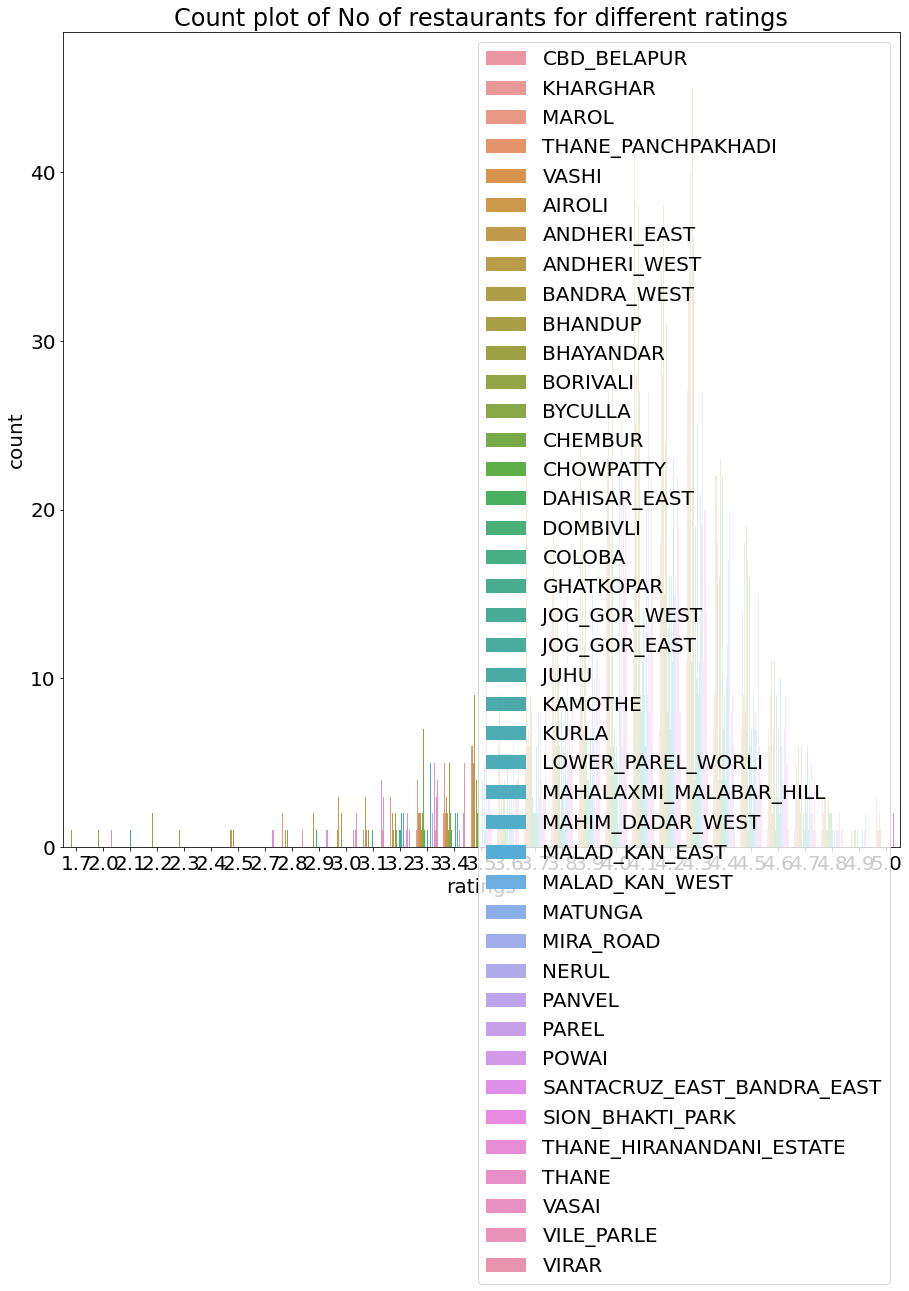

In [65]:
fig = plt.gcf()
sns.countplot(data = valid_data, hue = 'locality', x = 'ratings').legend(loc=1)
plt.title('Count plot of No of restaurants for different ratings')
fig.set_size_inches(15, 15)
plt.show()

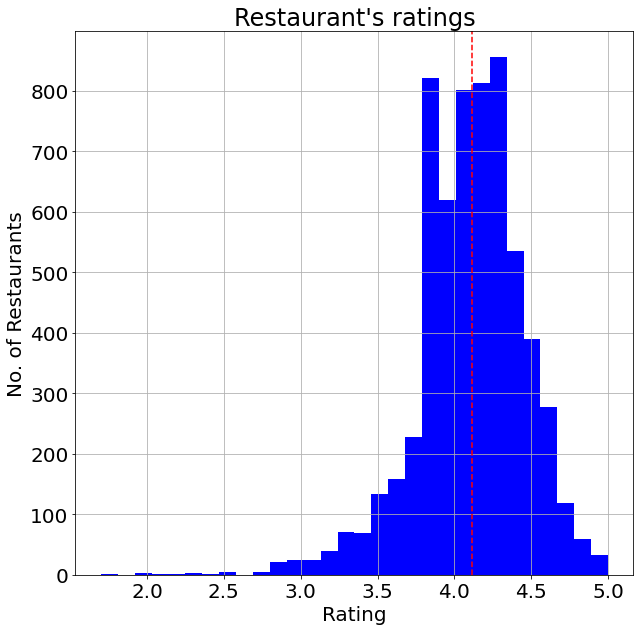

4.112982341399576


In [66]:
plt.figure(figsize=(10,10))
valid_data.ratings.hist(color='blue',bins=30)
plt.axvline(x=valid_data.ratings.mean(),color='red',ls='--')
plt.title("Restaurant's ratings")
plt.xlabel('Rating')
plt.ylabel('No. of Restaurants')
plt.show()
print(valid_data.ratings.mean())
